# [Logistic Regression](#Sec:LogisticRegression)
- ## [Regularization](#Sec:Regularization)
- ### [Softmax regression](#Sec:Softmax)

# [Support Vector Machines](#Sec:SVM)
- ### [The kernel trick](#Sec:kernel)

# [SVM Regressor](#Sec:SVMRegressor)

# [Logistic Regression VS SVM](#Sec:LRVSSVM)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


<a id='Sec:LogisticRegression'></a>

# Logistic Regression
The logistic function is commonly used to classify instances and determine their probability of belonging to a specific class.

Logistic function in scikit-learn can be found <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">here</a>.


Imagine that you have two classes (1 and 0) and one feature (t).

Then you can define a probability, function of t, to predict whether or not each instance belongs to the class 1.



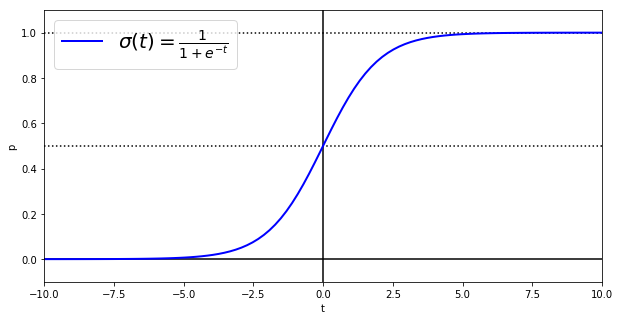

In [2]:
t = np.linspace(-10, 10, 100)

sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(10, 5))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.ylabel("p")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Then you can make predicitons using the following model

$\Large \hat{y}^{(i)} = \begin{cases} 0 & if & \hat{p}^{(i)}< 0.5 \\ 1 & if & \hat{p}^{(i)}\geq 0.5  \end{cases}  $

The model could be trained using the following cost function for each single training instance.

$\Large C^{(i)}(\theta)= \begin{cases} -log(\hat{p}^{(i)}) & \text{if y$^{(i)}$=1} \\ -log(1-\hat{p}^{(i)}) & \text{if y$^{(i)}$=0}  \end{cases} $

This cost function calculated for each instance will force the model to predict very high probabilities for y$^{(i)}$=1 and very low probabilities for y$^{(i)}$=0.

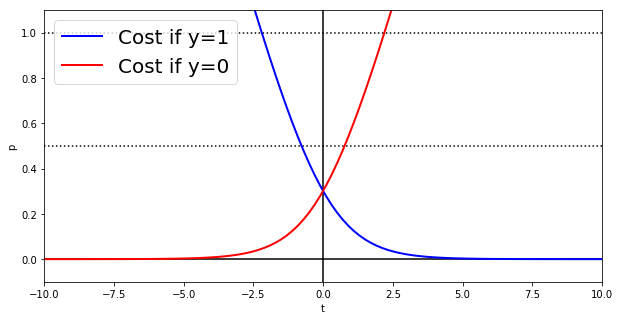

In [3]:
t = np.linspace(-10, 10, 100)

sig = 1 / (1 + np.exp(-t))
prob_1 = -np.log10(sig)
prob_0 = -np.log10(1-sig)

plt.figure(figsize=(10, 5))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, prob_1, "b-", linewidth=2, label=r"Cost if y=1")
plt.plot(t, prob_0, "r-", linewidth=2, label=r"Cost if y=0")
plt.ylabel("p")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Instead this would be the total Loss function.

$\Large J(\theta)= \frac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})] $


![](https://dl.dropboxusercontent.com/s/rc7xv2uu2ug0guf/iris.png?dl=0)


In [4]:
from sklearn import datasets
iris = datasets.load_iris()

print("Features: {}".format(iris.feature_names))
print("Target names: {}".format(iris.target_names))

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [24]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

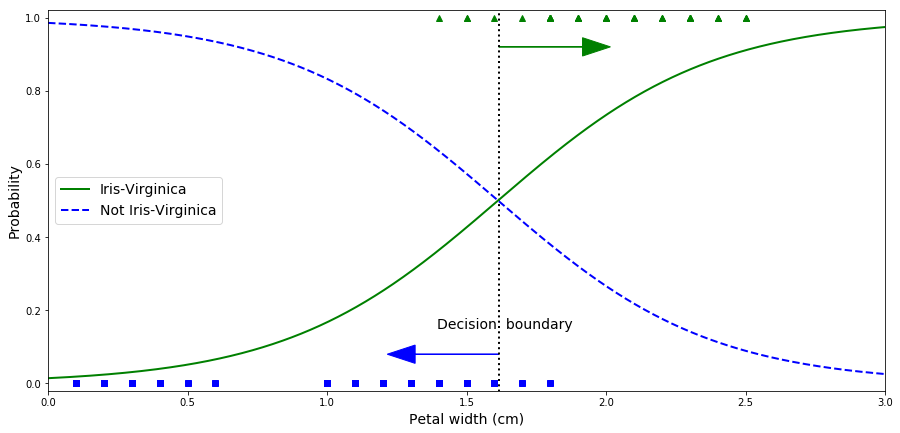

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(15,7 ))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [26]:
print("The decision boundary is at {} cm".format(round(decision_boundary[0],2)))


The decision boundary is at 1.62 cm


In [27]:
print("Hard classifier")
log_reg.predict([[1.7], [1.5]])

Hard classifier


array([1, 0])

In [28]:
print("Soft classifier")
log_reg.predict_proba([[1.7], [1.5]])

Soft classifier


array([[0.44316529, 0.55683471],
       [0.57328164, 0.42671836]])

We can run LogisticRegression also on datasets with more than one features. How?

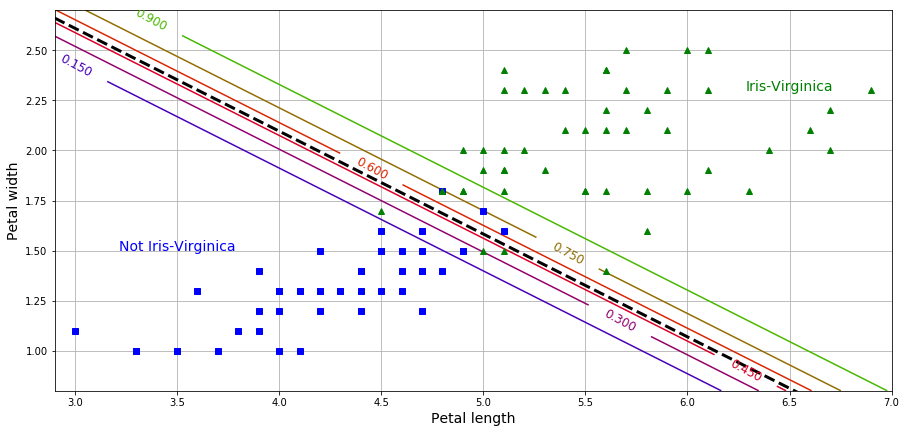

In [30]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=1e3, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(15, 7))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

In [31]:
log_reg.predict_proba([[3.9,2.]])

array([[0.80094651, 0.19905349]])

<a id='Sec:Regularization'></a>

### Regularization

For this kind of algorithms, the regularization is controlled by the C parameter.

$\Large J(\theta)_{reg} = J(\theta) + \frac{1}{C}penalty(l_{2},l_{1},elasticnet)$

Thus, a small C value means thet we give more weight to regularization.

A large C value means that we give little importance to regularization.

QUESTION 1

<a id='Sec:Softmax'></a>

### Softmax regression (or multinomial logistic regression)

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression**.

For a given instance x, the Softmax Regression model first computes a score $s_{k}(x)$ for each class k.

$\Large s_{k}(x)=x^{T}\theta^{(k)}$

Note that each class has its own dedicated parameter vector $\theta^{(k)}$.

Once you have computed the score of every class for the instance x, you can estimate the probability p$_k$ that the instance belongs to class k by running the scores through the softmax function:

$\Large p_{k}=\frac{exp(s_{k}(x))}{\sum_{j=1}^{K}exp(s_{j}(x))}$

K is the number of classes, while k is the k$^{th}$ class.

Note that the Softmax Regression classifier predicts only one class at a time (i.e., it is **multiclass**, not **multioutput**) so it should be used only with mutually exclusive classes, such as different types of plants. For instance, you cannot use it to recognize multiple people in one picture.

Just like Logistic Regression classifier, Softmax predicts the class with the highest probability. Which means the highest score s$_{k}$:

$\Large \hat{y} = argmax_{k}[s_{k}(x)]$

The argmax operator returns the value of a variable that maximizes a function. In this case, it returns the value of k that maximizes the s$_{k}$(x).

Now we need to define the Loss function. The following function is also called **cross entropy**:

$\Large J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_{k}^{(i)}log(\hat{p}_{k}^{(i)})$

Notice that y$_{k}^{(i)}$ $\neq$ y$^{(i)}$. y$_{k}^{(i)}$ is the target probability that the i$^{th}$ instance belongs to class k. It is either equal to 1 or 0.

Also, notice that when there are just two classes (K=2), the cross entropy is equal to the Loss function of Logistic Regression.

In [36]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1e1, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10.0, multi_class='multinomial', random_state=42)

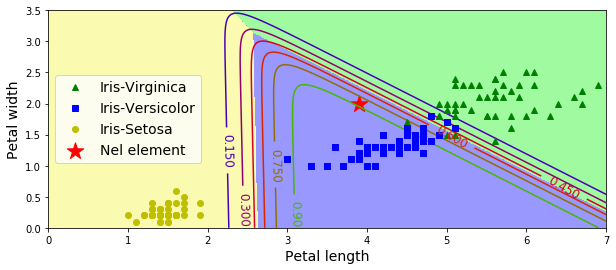

In [37]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 1000).reshape(-1, 1),
        np.linspace(0, 3.5, 400).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.scatter([3.9],[2.], s=300, marker='*', label='Nel element', color=['red'])
plt.legend(loc="center left", fontsize=14)

plt.axis([0, 7, 0, 3.5])
plt.show()

In [38]:
print("Probabilities: {}".format(softmax_reg.predict_proba([[3.9,2.]])))
print("Predicted class: {}".format(softmax_reg.predict([[3.9,2.]])))

Probabilities: [[0.00178345 0.86770374 0.13051281]]
Predicted class: [1]


<a id='Sec:SVM'></a>

# Support Vector Machines (SVM)

The **SVM Classifier** in scikit-learn can be found <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC">here</a>.

The **SVM Regressor** in scikit-learn can be found <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR">here</a>.


<img src="https://dl.dropboxusercontent.com/s/hh5vabhz7ujp0n7/SVM.png?dl=0" width="1000">


The objective of SVM is to maximize the **margin**.

The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called **support vectors**.

NOTE. SVMs are sensitive to the feature scales. On the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary looks much better (on the right plot).

<img src="https://dl.dropboxusercontent.com/s/ypxv4fro5tumgpq/SVM_scaling.png?dl=0" width="1000">




### The math under the hood

The linear SVM classifier model predicts the class of a new instance x by computing the decision function

$\Large {\bf w^{T}x} + b = w_{1}x_{1}+ ... +w_{n}x_{n} + b$

If the result is positive, the predicted class $\hat{y}$ is the positive class (iris virginica), or else it is the negative class (non-iris virginica).

Think about it as a hyperplane.


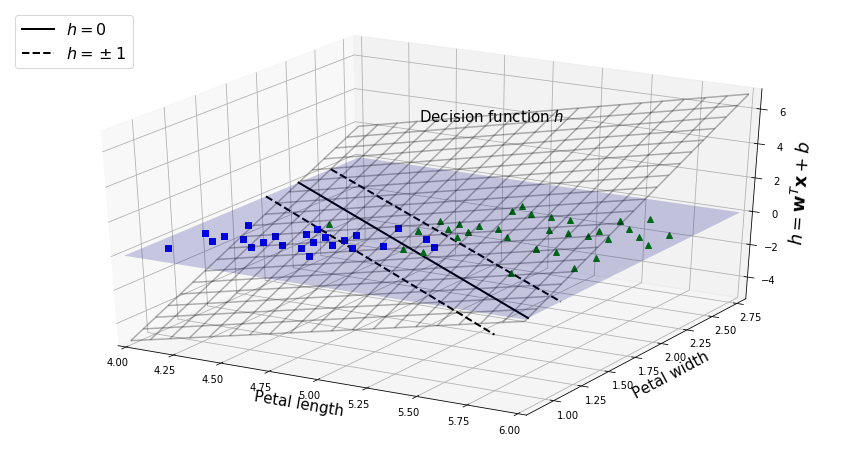

In [39]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

from sklearn.svm import SVC
svm_clf2 = SVC(kernel="linear", C=5)
svm_clf2.fit(X, y.ravel())

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

$ \Large z = {\bf w^{T}x}+b$ is a plane.


$ \Large {\bf w^{T}x}+b = 0$ is the decision boundary, the black solid line in the plot.

Instead, the margin (the black dashed lines) can be defined by

$ \Large   \hat{y} = \begin{cases}
      -1~~~if~~~{\bf w^{T}x}+b < -1\\
      1~~~~~if~~~{\bf w^{T}x}+b > 1
    \end{cases}\
$


Training a linear SVM classifier means finding the value of w and b that make this margin as wide as possible.

In practice, this means minimizing the slope of the plane: $||{\bf w}|| = \sqrt{\sum_{j=1}^{m}w_{j}^{2}}$

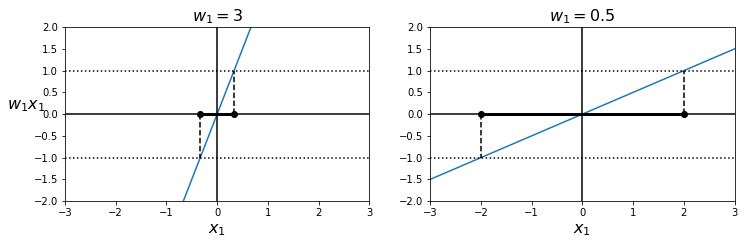

In [40]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(3, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

So we want to minimize $||{\bf w}||$ to get a large margin.

In practice, what the SVM minimizes is 

$\Large \frac{1}{2}{\bf w^{T}w} = \frac{1}{2}||{\bf w}||^2$

simply because it is differentiable (which is useful for most optimizers).

### Soft margin

If we strictly impose that condition, all instances be will on the right side. This is called **hard margin classification**. There are two main issues with hard margin classification. First, it only works if the data is linearly separable, and second it is quite sensitive to outliers.

<img src="https://dl.dropboxusercontent.com/s/ncmta5ms23b3ttk/SVM_soft_margin.png?dl=0" width="900">

To avoid these issues it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called **soft margin classification**.
You can control this balance using the C hyperparameter, which controls the penalty for misclassification.

The new function to be minimized is

$\Large \frac{1}{2}{\bf w^{T}w} + C\sum_{i=1}^{n}\zeta^{(i)}$

where the new variable $\zeta^{(i)}\geq 0$ measures how much the i$^{th}$ instance is allowed to violate the margin.

$\Large   \hat{y}^{(i)} = \begin{cases}
-1 & w^{T}x^{(i)}+ b + \zeta^{(i)} < 0\\
1 & w^{T}x^{(i)}+ b + \zeta^{(i)} > 0 
\end{cases}\
$

So, the new objective is minimizing:

$\Large \frac{1}{2}||{\bf w}||^2 + C\left (\sum_{i}\zeta^{(i)}\right )$

The C hyper-parameter is a sort of parameter that controls regularization. Similar to the C parameter in Logistic Regression.

QUESTION 3




In [52]:
#<img src="https://dl.dropboxusercontent.com/s/pfhqpiuriiomm8b/SVM_C.png?dl=0" width="900">


QUESTION 5


<a id='Sec:kernel'></a>

### Non-linear SVM classification. The kernel trick

Many datasets are not linearly separable. One approach to handling nonlinear datasets is to add more features.

<img src="https://dl.dropboxusercontent.com/s/knm65ti8ncbvxd4/Kernel_trick.png?dl=0" width="800">

Another example in 1D.

<img src="https://dl.dropboxusercontent.com/s/2j804bed7oev5ax/kernel_trick_1D.png?dl=0" width="800">

In this case I have added a second feature

$\Large X_2 = (x_1)^2$

and the resulting 2D dataset is perfectly linearly separable.

A **kernel** is the function that maps low dimensional data into a higher dimensional space. 

A kernel is not just any function. It must be: 
- continuous 
- symmetric (i.e., K(a,b)=K(b,a)). 

There are different types of kernels implemented in Scikit Learn anche that you can use for SVM.

<img src="https://dl.dropboxusercontent.com/s/jzjvw5brqngexeg/kernels.png?dl=0" width="800">

The **Gaussian Radial Basis Function** kernel is a very common one. It maps how much each instance is similar to all the others.

A dataset with m instances and n features gets transformed into a dataset with m instances and m features.

<img src="https://dl.dropboxusercontent.com/s/pm1z850ze8tms0w/kernel_RBF.png?dl=0" width="800">

Increasing $\gamma$ makes the bell-shape curve narrower\, and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small $\gamma$ value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother.

<img src="https://dl.dropboxusercontent.com/s/4bc7veggx88u2c0/SVM_hyperparameters.png?dl=0" width="800">



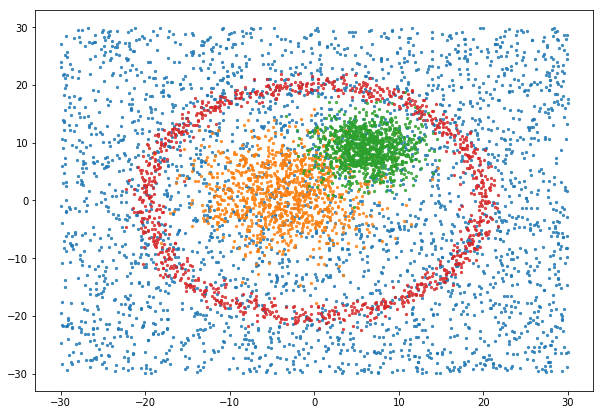

In [41]:
X1 = np.random.normal([-3.2,1], 5, size=(1000, 2))
X2 = np.random.normal([6.2,9], 3, size=(1000, 2))
X_field = np.random.uniform([-30,-30], [30,30], size=(3000, 2))
cir, cir_pred = datasets.make_circles(n_samples=2000, factor=0.5, noise=0.05)
cir = cir[cir_pred==0]*20

y1=np.zeros(1000)
y2=np.ones(1000)
ycir = np.ones(1000)*2
yfield=np.ones(3000)*3


plt.figure(figsize=(10,7))

plt.scatter(X_field[:,0], X_field[:,1], s=5, alpha=0.8)
plt.scatter(X1[:,0], X1[:,1], s=5, alpha=0.8)
plt.scatter(X2[:,0], X2[:,1], s=5, alpha=0.8)
plt.scatter(cir[:,0], cir[:,1], s=5, alpha=0.8)



Text(0.5, 1.0, 'Accuracy: 0.8095959595959596')

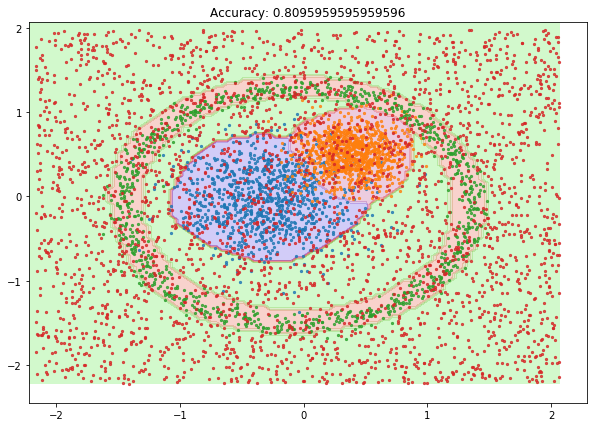

In [53]:
X = np.concatenate([X1,X2,cir,X_field])
y = np.concatenate([y1,y2,ycir,yfield])

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
X_std = StandardScaler().fit_transform(X)

svm_clf = SVC(kernel="rbf", C=1., gamma=2,  probability=True)
svm_clf = SVC(kernel="rbf", C=100., probability=True)
svm_clf = SVC(kernel="rbf", C=10., gamma=1, probability=True)
svm_clf = SVC(kernel="rbf", C=100., gamma=0.6, probability=True)

svm_clf.fit(X_train_std, y_train)

axes = [min(X_std.ravel()), max(X_std.ravel()), min(X_std.ravel()), max(X_std.ravel())]
plt.figure(figsize=(10,7))

x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_grid = np.c_[x0.ravel(), x1.ravel()]
y_pred = svm_clf.predict(X_grid).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plt.scatter(X_std[y==0,0], X_std[y==0,1], s=5, alpha=0.8)
plt.scatter(X_std[y==1,0], X_std[y==1,1], s=5, alpha=0.8)
plt.scatter(X_std[y==2,0], X_std[y==2,1], s=5, alpha=0.8)
plt.scatter(X_std[y==3,0], X_std[y==3,1], s=5, alpha=0.8)

plt.title("Accuracy: {}".format(accuracy_score(svm_clf.predict(X_test_std),y_test)))



<a id='Sec:SVMRegressor'></a>


# SVM Regressor

SVM also supports linear and nonlinear regression. The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter $\epsilon$.

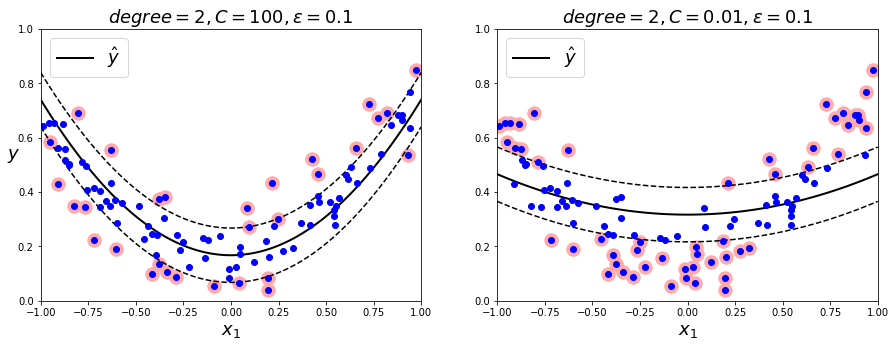

In [19]:
from sklearn.svm import SVR


np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

<a id='Sec:LRVSSVM'></a>

# Logistic Regression VS SVM

- **LR** is used for classification, while **SVM** can be used for both classification and regression.

- **SVM** try to maximize the margin between the closest support vectors while **LR** the posterior class probability. Thus, **SVM** find a solution which is as fare as possible for the two categories while **LR** has not this property.

<img src="https://dl.dropboxusercontent.com/s/98amydlerez83u5/LR_SVM_1.png?dl=0" width="500">


- **LR** is more sensitive to outliers than **SVM** because the cost function of LR diverges faster than those of SVM.

<img src="https://dl.dropboxusercontent.com/s/vhmf6pts74jnoc3/LS_SVM_2.png?dl=0" width="500">

- **SVM** extends by using kernel tricks, transforming datasets into rich features space, so that complex problems can be still dealt with in the same “linear” fashion in the lifted hyper space.

- If number of features >> number of training instances. First try **LR** or **SVM** without kernel.